In [1]:
import keras

import numpy as np

from augmenter import Augmenter
from image_generator import deepaugment_generator

Using TensorFlow backend.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
TRAIN_SIZE = 10000
BATCH_SIZE = 64

In [4]:
from build_features import DataOp

data, inp_shape = DataOp.load("cifar10", TRAIN_SIZE)
data = DataOp.preprocess(data)
# ['brighten', 0.107, 'translate-x', 0.025, 'fog', 0.035, 1.0]
# ['sharpen', 0.105, 'coarse-dropout', 0.604, 'translate-y', 0.836, 1.0]
policy = [
    {
        "aug1_type": "brighten",
        "aug1_magnitude": 0.107,
        "aug2_type": "translate-x",
        "aug2_magnitude": 0.025,
        "aug3_type": "fog",
        "aug3_magnitude": 0.035,
        "portion": 1.0,
    },
    {
        "aug1_type": "sharpen",
        "aug1_magnitude": 0.105,
        "aug2_type": "coarse-dropout",
        "aug2_magnitude": 0.604,
        "aug3_type": "translate-y",
        "aug3_magnitude": 0.836,
        "portion": 1.0,
    }
]

tested_generator = deepaugment_generator(data["X_train"], data["y_train"], policy, batch_size=64, augment_chance=0)


In [5]:
ims = next(tested_generator)
ims[0].shape

(64, 32, 32, 3)

### Each set of consequtive 4 images should have either non-augmented or augmented by one of the policies

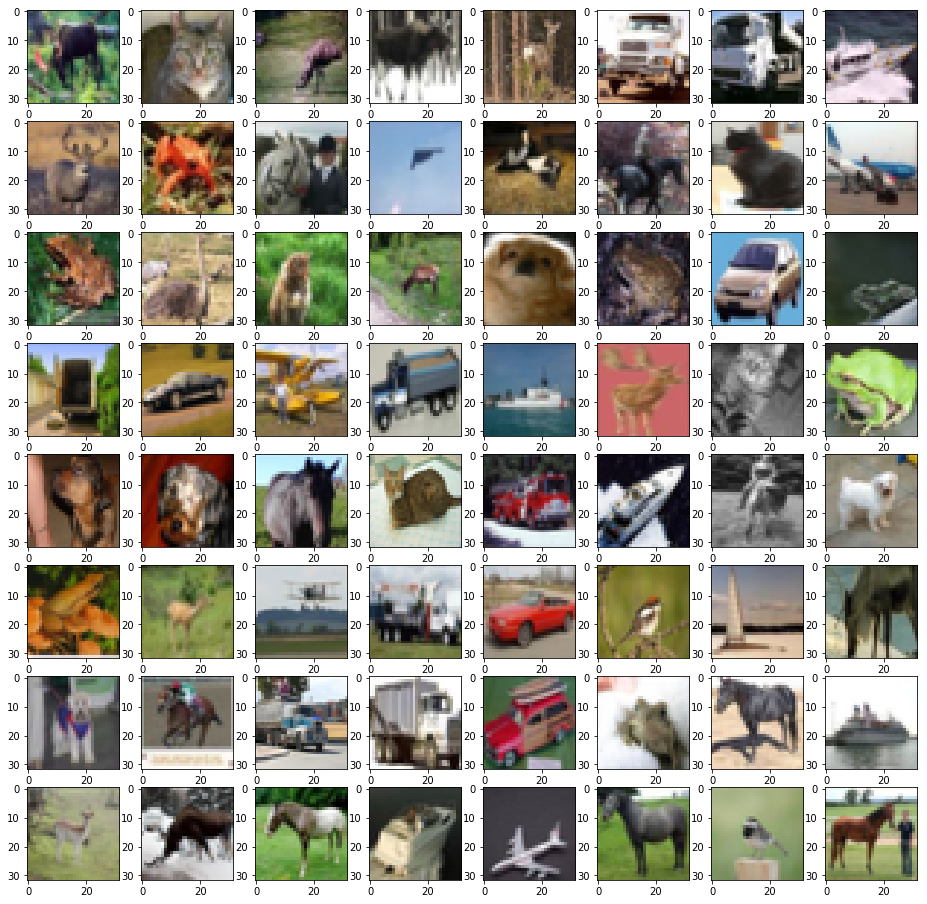

In [6]:
plt.figure(figsize=(16,16))
for i in range(1,65):
    plt.subplot(8,8,i)
    plt.imshow(ims[0][i-1])

In [7]:
import logging
from childcnn import ChildCNN

X_val = data["X_val_seed"][:1000]
y_val = data["y_val_seed"][:1000]

# Train child model with augmented data (using generator in test)

In [8]:
child_model = ChildCNN(
    model_name="basiccnn", input_shape=inp_shape, batch_size=64, num_classes=10,
    pre_augmentation_weights_path="initial_model_weights.h5", logging=logging
)

history_of_augmented_model = child_model.model.fit_generator(
    tested_generator,
    steps_per_epoch=TRAIN_SIZE//BATCH_SIZE,
    epochs=50,
    validation_data=(X_val, y_val)
)

del child_model

BasicCNN model built as child model.
 Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)      

Epoch 41/50
156/156 [==============================] - 24s 152ms/step - loss: 0.9375 - acc: 0.6746 - val_loss: 1.1067 - val_acc: 0.6210
Epoch 42/50
156/156 [==============================] - 24s 151ms/step - loss: 0.9323 - acc: 0.6763 - val_loss: 1.0306 - val_acc: 0.6460
Epoch 43/50
156/156 [==============================] - 24s 152ms/step - loss: 0.9459 - acc: 0.6778 - val_loss: 1.1855 - val_acc: 0.6220
Epoch 44/50
156/156 [==============================] - 24s 151ms/step - loss: 0.9474 - acc: 0.6744 - val_loss: 0.9442 - val_acc: 0.6700
Epoch 45/50
156/156 [==============================] - 23s 149ms/step - loss: 0.9367 - acc: 0.6740 - val_loss: 0.9417 - val_acc: 0.6680
Epoch 46/50
156/156 [==============================] - 24s 151ms/step - loss: 0.9288 - acc: 0.6823 - val_loss: 1.0290 - val_acc: 0.6500
Epoch 47/50
156/156 [==============================] - 24s 151ms/step - loss: 0.9364 - acc: 0.6757 - val_loss: 1.1379 - val_acc: 0.6170
Epoch 48/50
156/156 [===========================

# Train child model with non-augmented data

In [9]:
child_model = ChildCNN(
    model_name="basiccnn", input_shape=inp_shape, batch_size=64, num_classes=10,
    pre_augmentation_weights_path="initial_model_weights.h5", logging=logging
)

history_of_non_augmented_model = child_model.model.fit(
    x=data["X_train"],
    y=data["y_train"],
    batch_size=BATCH_SIZE,
    epochs=50,
    validation_data=(X_val, y_val)
)

del child_model

BasicCNN model built as child model.
 Model summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)      

Epoch 40/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9434 - acc: 0.6725 - val_loss: 1.1066 - val_acc: 0.6210
Epoch 41/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9409 - acc: 0.6726 - val_loss: 1.0939 - val_acc: 0.6230
Epoch 42/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9402 - acc: 0.6804 - val_loss: 1.1099 - val_acc: 0.6240
Epoch 43/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9392 - acc: 0.6765 - val_loss: 1.0613 - val_acc: 0.6070
Epoch 44/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9315 - acc: 0.6784 - val_loss: 1.2671 - val_acc: 0.5900
Epoch 45/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9405 - acc: 0.6794 - val_loss: 0.9833 - val_acc: 0.6500
Epoch 46/50
10000/10000 [==============================] - 23s 2ms/step - loss: 0.9380 - acc: 0.6764 - val_loss: 1.0206 - val_acc: 0.6620
Epoch 47/50
10000/10000 [=========

In [10]:
aug_hist_df = pd.DataFrame(history_of_augmented_model)
nonaug_hist_df = pd.DataFrame(history_of_nonaugmented_model)

p

NameError: name 'pd' is not defined